# Import Library and Overview Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import seaborn as sn
import matplotlib.pyplot as plt
import random
import plotly.express as ex
from sklearn.linear_model import LogisticRegression
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('BankChurner.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,home_ownership,employees
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,RENT,No
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,OWN,Yes
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,MORTGAGE,No
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,MORTGAGE,No
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,MORTGAGE,No


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
def ratio_of_label(array):
  outputs = []
  labels = []
  final = {}
  sum = 0
  for i in array:
    sum += 1
    if i not in final.keys():
      final[i] = 1
    else:
      final[i] += 1
  for label in final:
    final[label] = final[label] / sum * 100
    outputs.append(final[label])
    labels.append(label)
  return outputs, labels


# Data Preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
le.fit(df['Education_Level'])
df['Education_Level'] = le.transform(df['Education_Level'])
le.fit(df['Income_Category'])
df['Income_Category'] = le.transform(df['Income_Category'])
le.fit(df['Marital_Status'])
df['Marital_Status'] = le.transform(df['Marital_Status'])
le.fit(df['Card_Category'])
df['Card_Category'] = le.transform(df['Card_Category'])
le.fit(df['home_ownership'])
df['home_ownership'] = le.transform(df['home_ownership'])
le.fit(df['employees'])
df['employees'] = le.transform(df['employees'])
le.fit(df['Attrition_Flag'])
df['Attrition_Flag'] = le.transform(df['Attrition_Flag'])

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,home_ownership,employees
0,768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2,0
1,818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,1
2,713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0
3,769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0
4,709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0


In [ ]:
X_feature = {'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Credit_Limit', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'home_ownership', 'employees'}
X_feature = list(X_feature)
Y_feature = 'Attrition_Flag'

In [ ]:
X = df[X_feature]
y = df[Y_feature]

[83.934037720944, 16.065962279055988]


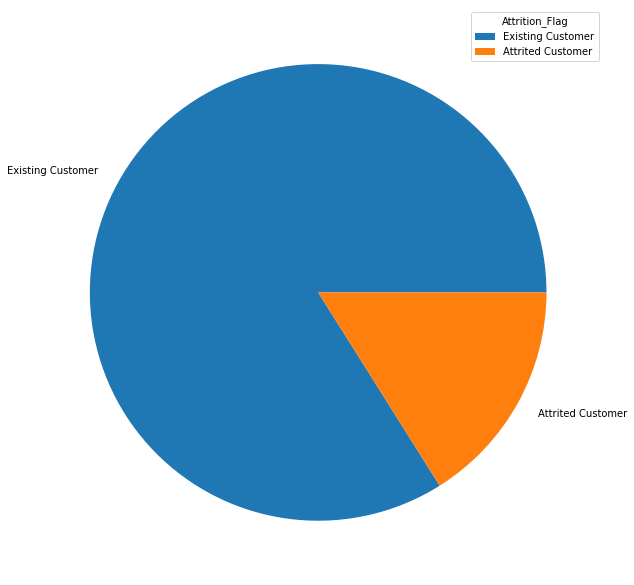

In [ ]:
outputs, labels = ratio_of_label(y)
print(outputs)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.pie(outputs, labels = ['Existing Customer', 'Attrited Customer'])
plt.legend(title = "Attrition_Flag")
fig.savefig('piechart.png', dpi=100)
plt.show() 

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
dummy_inputs = {}
number_of_feature = 5
for feature in X:
  dummy_inputs[feature] = []
for index in range(number_of_feature):
  for feature in X:
    dummy_inputs[feature].append(random.choice(X[feature]))
dummy_inputs = pd.DataFrame(dummy_inputs, index=[i for i in range(number_of_feature)])
dummy_inputs

,Card_Category,Total_Revolving_Bal,Avg_Utilization_Ratio,Credit_Limit,Dependent_count,Total_Ct_Chng_Q4_Q1,Months_on_book,Income_Category,Customer_Age,Education_Level,Months_Inactive_12_mon,employees,Avg_Open_To_Buy,home_ownership,Total_Trans_Amt,Total_Trans_Ct,Gender,Total_Amt_Chng_Q4_Q1,Marital_Status,Contacts_Count_12_mon,Total_Relationship_Count
0,0,0,0.066,1438.3,4,0.688,27,1,36,2,1,0,11477.0,0,4955,82,0,0.874,1,2,6
1,0,783,0.000,3263.0,2,0.818,52,4,42,5,3,0,18119.0,0,1732,94,1,0.850,2,3,5
2,0,991,0.000,2679.0,3,0.750,25,1,39,2,2,1,7582.0,1,2169,68,0,0.571,2,1,3
3,0,1540,0.000,9070.0,2,0.683,49,4,49,6,3,0,28411.0,0,1792,65,1,0.747,1,3,5
4,0,996,0.898,19853.0,2,0.440,43,1,44,1,3,0,508.0,0,1353,73,1,0.901,2,2,5


# Without Upsampling

## Logicstic Regression

Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Attrited Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.45      0.73      0.56       200
           1       0.97      0.90      0.93      1826

    accuracy                           0.88      2026
   macro avg       0.71      0.82      0.75      2026
weighted avg       0.92      0.88      0.90      2026

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Attrited Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.49      0.74      0.59       222
           1       0.97      0.91      0.94      1804

    accuracy                           0.89      2026
   macro avg       0.73      0.82      0.76      2026
weighted avg       0.91      0.89      0.90      2026

***************

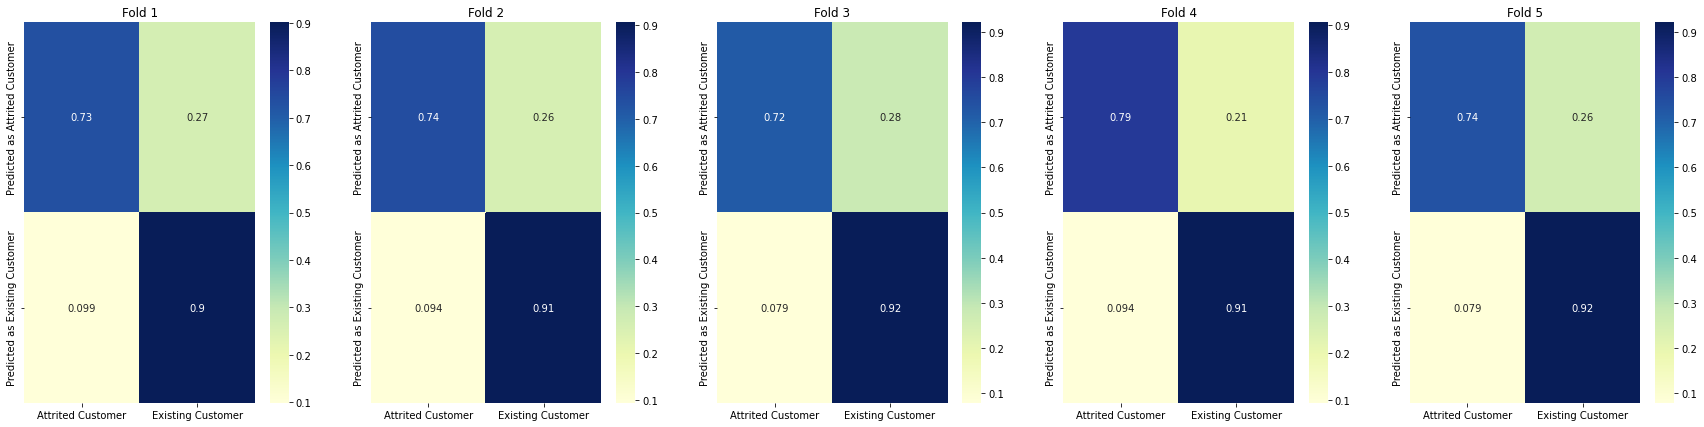

In [ ]:
lr = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count]) 
    dummy_outputs_lr = lr.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_lr)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_lr.png')
    count += 1

## K-Nearest Neighbors

Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.46      0.70      0.55       214
           1       0.96      0.90      0.93      1812

    accuracy                           0.88      2026
   macro avg       0.71      0.80      0.74      2026
weighted avg       0.91      0.88      0.89      2026

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Attrited Customer' 'Attrited Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.45      0.65      0.53       230
           1       0.95      0.90      0.92      1796

    accuracy                           0.87      2026
   macro avg       0.70      0.77      0.73      2026
weighted avg       0.90      0.87      0.88      2026

***************

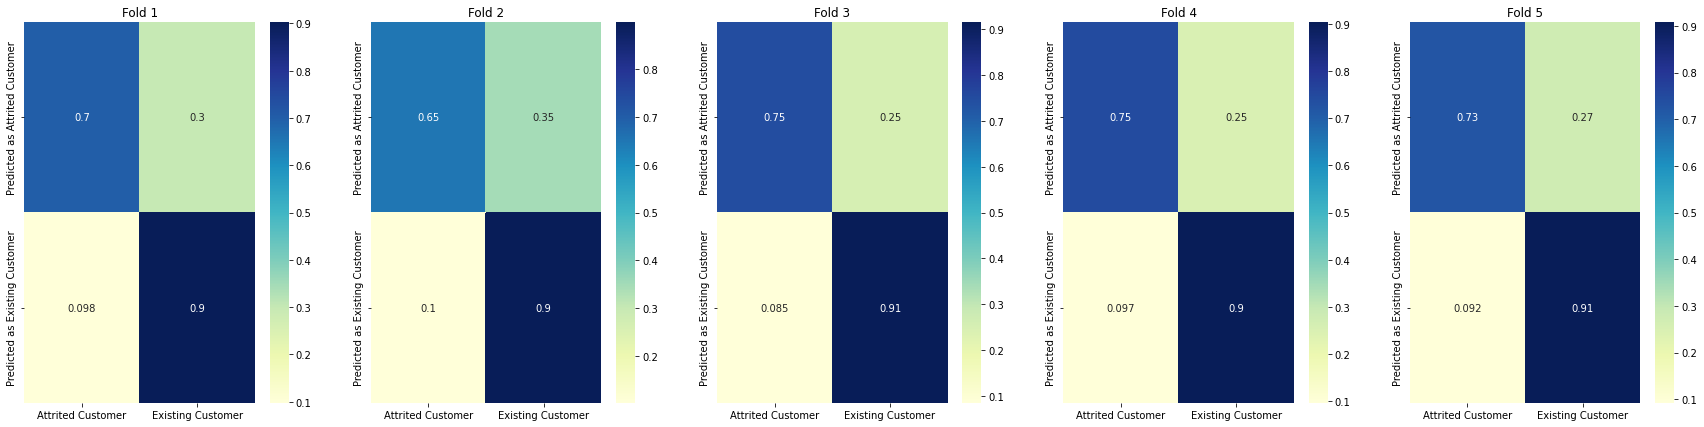

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_knn = knn.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_knn)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_knn.png')
    count += 1

## Ada Boost Classification


Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       310
           1       0.98      0.97      0.97      1716

    accuracy                           0.96      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       318
           1       0.98      0.97      0.97      1708

    accuracy                           0.95      2026
   macro avg       0.91      0.92      0.91      2026
weighted avg       0.95      0.95      0.95      2026

***************

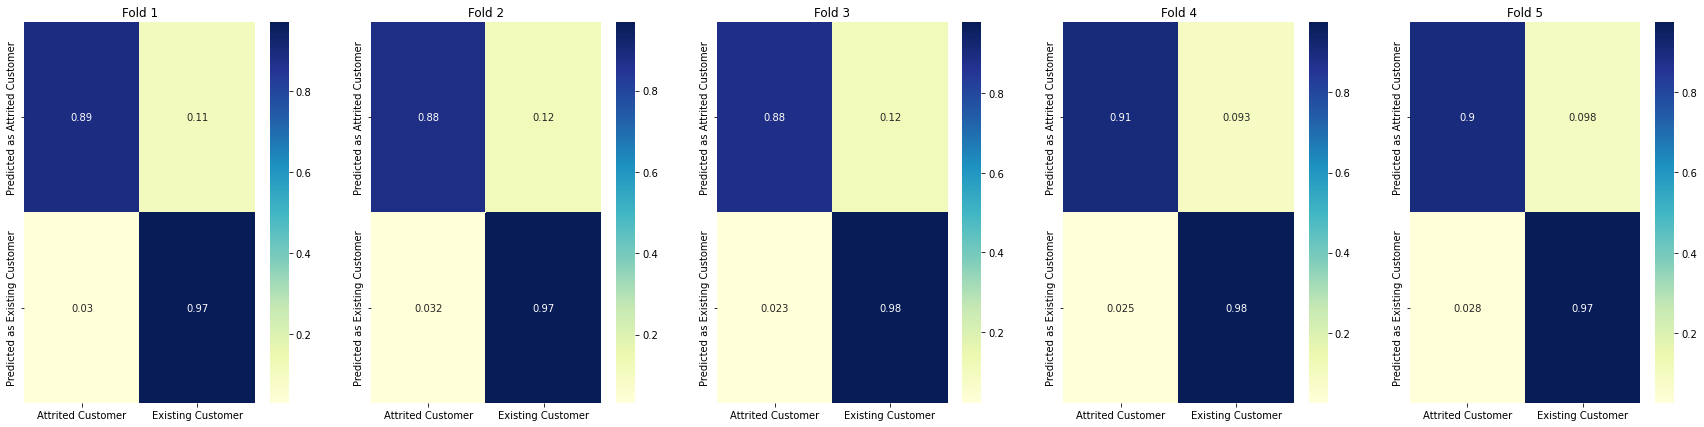

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_ada = ada.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_ada)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_ada.png')
    count += 1

## Random Forest Classification

Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       282
           1       0.99      0.96      0.97      1744

    accuracy                           0.96      2026
   macro avg       0.89      0.94      0.91      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       287
           1       0.99      0.96      0.98      1739

    accuracy                           0.96      2026
   macro avg       0.90      0.95      0.92      2026
weighted avg       0.96      0.96      0.96      2026

***************

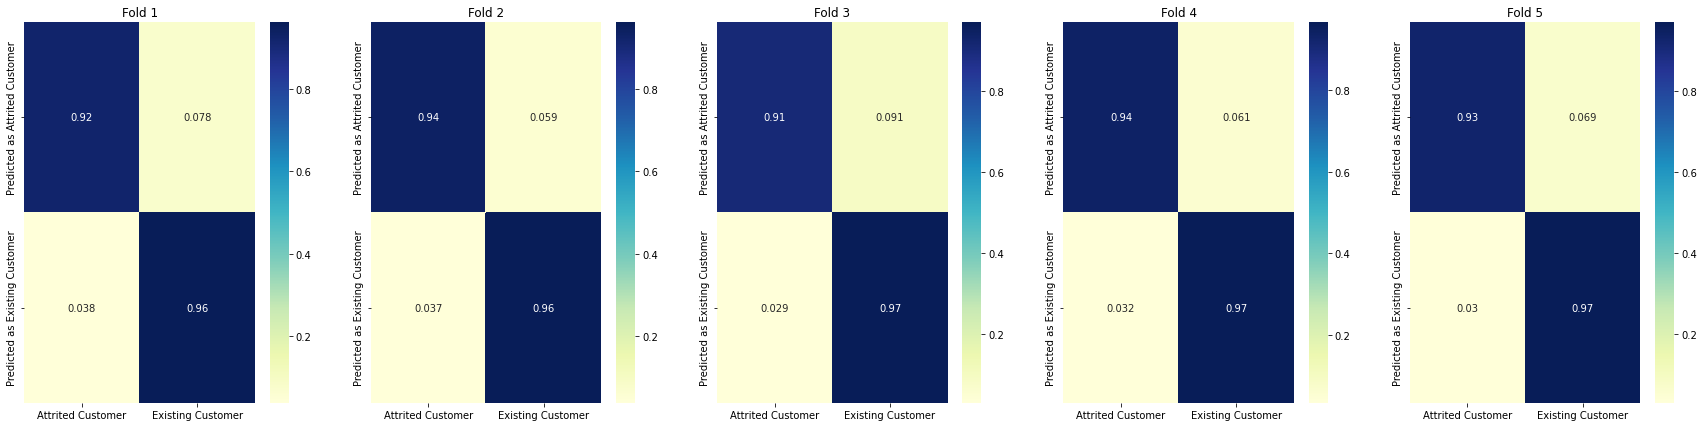

In [ ]:
rfc = RandomForestClassifier(random_state=42)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_rfc = rfc.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_rfc)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_rfc.png')
    count += 1

## Gradient Boosting Classification



Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       304
           1       0.98      0.97      0.98      1722

    accuracy                           0.96      2026
   macro avg       0.92      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       309
           1       0.98      0.97      0.98      1717

    accuracy                           0.96      2026
   macro avg       0.92      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026

***************

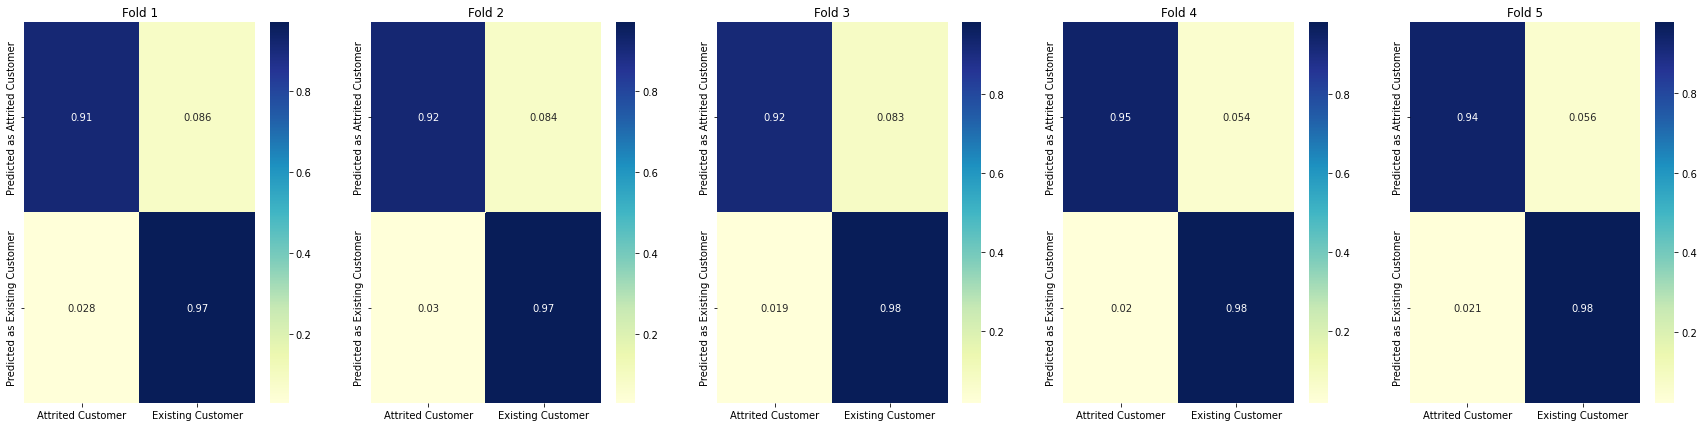

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=42)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    
    dummy_outputs_gbc = gbc.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_gbc)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_gbc.png')
    count += 1

# Upsampling Using SMOTE

(17000, 21)


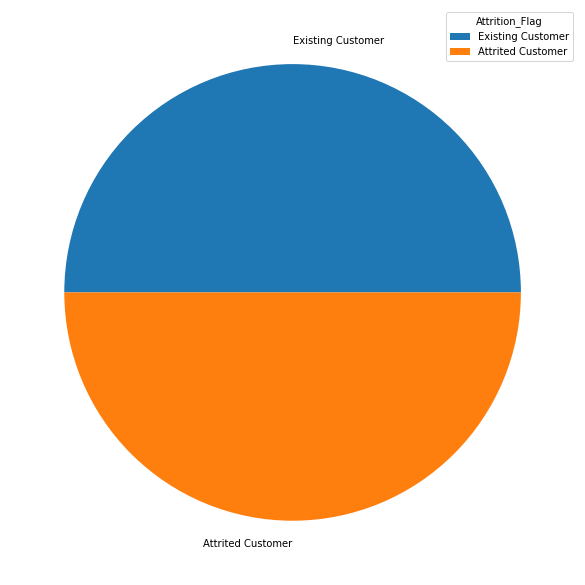

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
print(X.shape)
outputs, labels = ratio_of_label(y)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.pie(outputs, labels = ['Existing Customer', 'Attrited Customer'])
plt.legend(title = "Attrition_Flag")
fig.savefig('piechart_smote.png', dpi=100)
plt.show() 

## Logicstic Regression


Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Attrited Customer']
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1693
           1       0.90      0.89      0.90      1707

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Attrited Customer']
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1623
           1       0.90      0.90      0.90      1777

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

***************

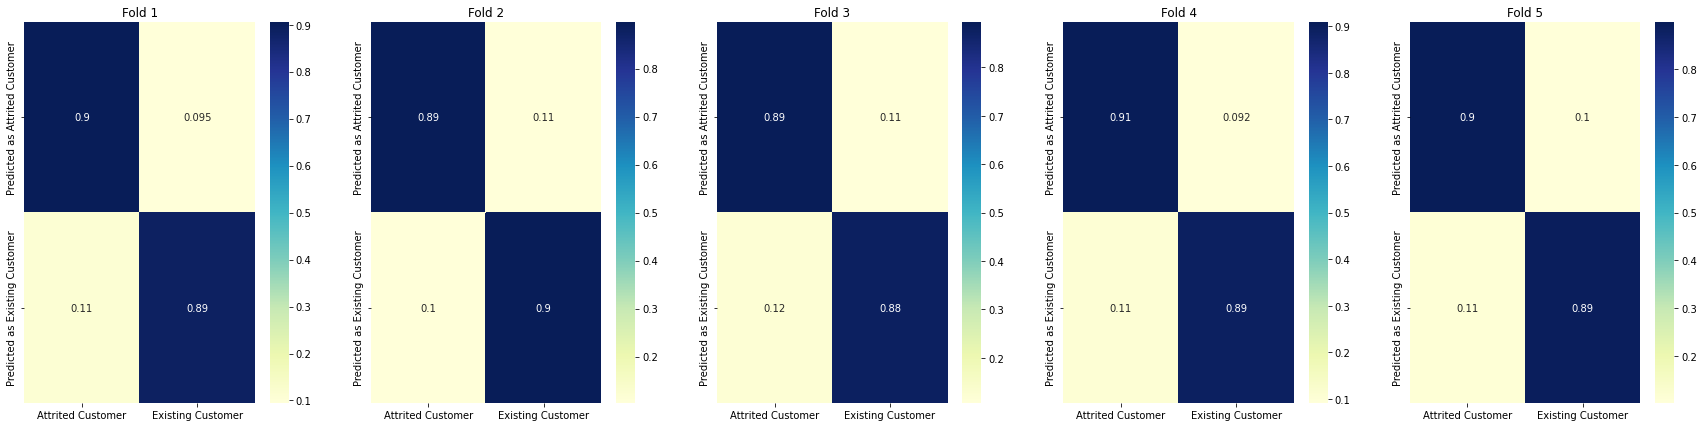

In [ ]:
lr_smote = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    lr_smote.fit(X_train,y_train)
    y_pred = lr_smote.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_lr_smote = lr_smote.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_lr_smote)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_lr_smote.png')
    count += 1

## K-Nearest Neighbors

Predict dummy inputs at Fold 1: ['Existing Customer' 'Attrited Customer' 'Attrited Customer'
 'Attrited Customer' 'Attrited Customer']
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1808
           1       0.84      0.88      0.86      1592

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Attrited Customer' 'Attrited Customer'
 'Attrited Customer' 'Attrited Customer']
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1747
           1       0.84      0.89      0.86      1653

    accuracy                           0.86      3400
   macro avg       0.86      0.86      0.86      3400
weighted avg       0.87      0.86      0.86      3400

***************

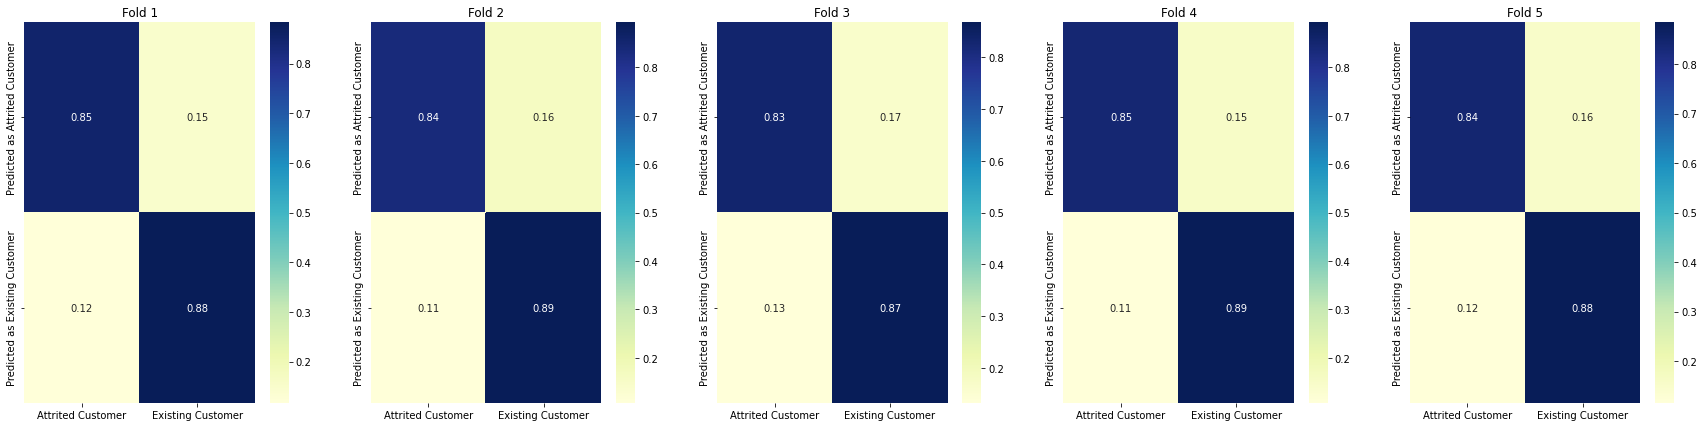

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=50)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    knn_smote.fit(X_train,y_train)
    y_pred = knn_smote.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_knn_smote = knn_smote.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_knn_smote)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_knn_smote.png')
    count += 1

## Ada Boost Classfication

Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1729
           1       0.96      0.96      0.96      1671

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1652
           1       0.96      0.97      0.96      1748

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400

***************

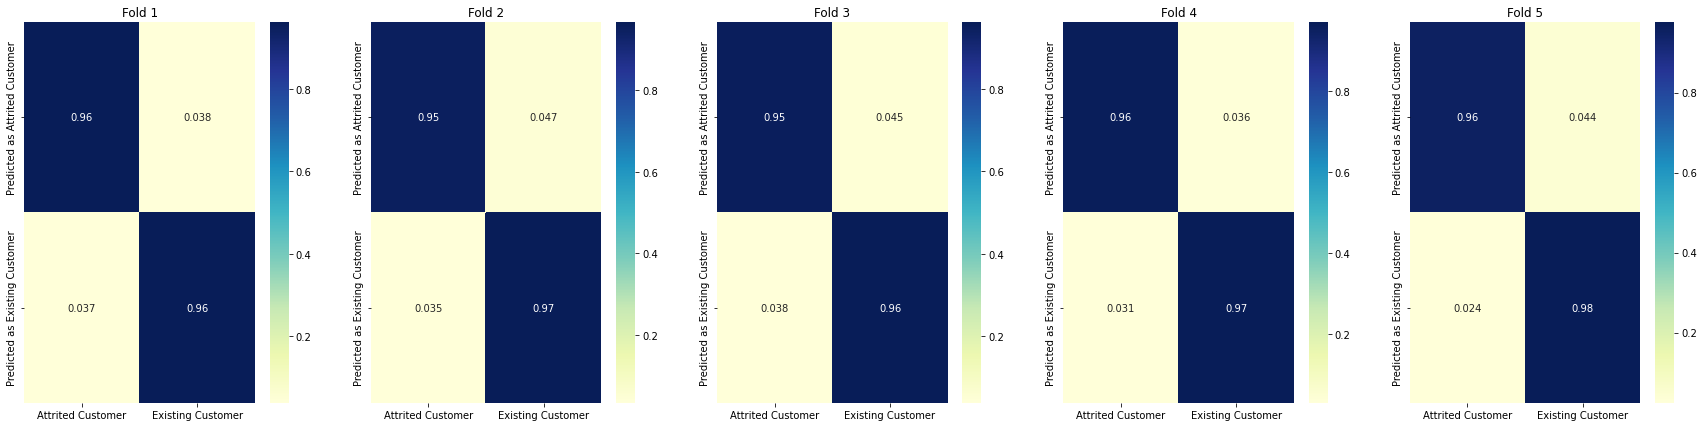

In [ ]:
ada_smote = AdaBoostClassifier(n_estimators=100, random_state=0)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    ada_smote.fit(X_train,y_train)
    y_pred = ada_smote.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_ada_smote = ada_smote.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_ada_smote)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_ada_smote.png')
    count += 1

## Random Forest Classfication

Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1747
           1       0.97      0.98      0.98      1653

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1659
           1       0.97      0.99      0.98      1741

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

***************

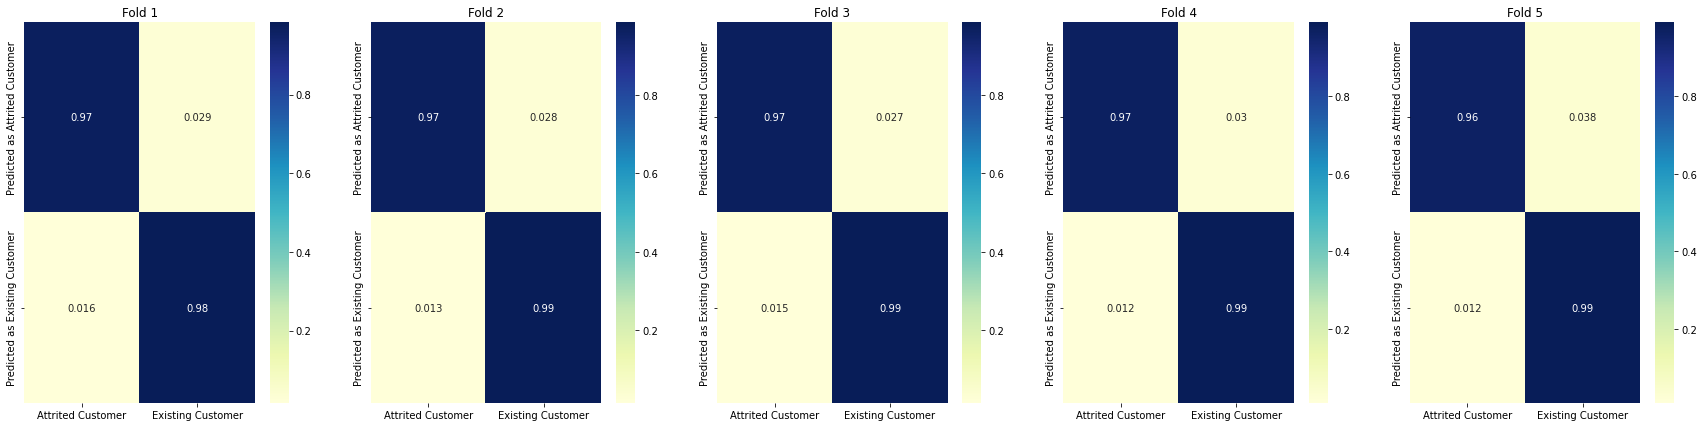

In [ ]:
rfc_smote = RandomForestClassifier(random_state=42)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    rfc_smote.fit(X_train,y_train)
    y_pred = rfc_smote.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_rfc_smote = rfc_smote.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_rfc_smote)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_rfc_smote.png')
    count += 1

## Gradient Boosting Classification

Predict dummy inputs at Fold 1: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1741
           1       0.98      0.99      0.98      1659

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

************************************************************
Predict dummy inputs at Fold 2: ['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer']
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1657
           1       0.98      0.99      0.98      1743

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

***************

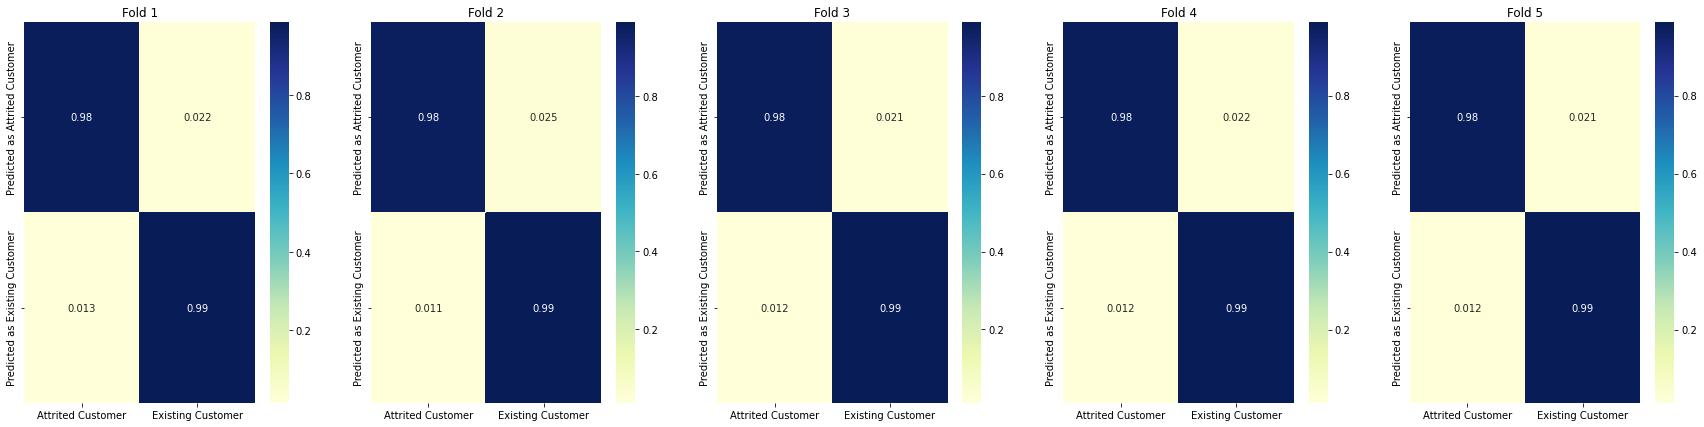

In [ ]:
gbc_smote = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=42)
ax = []
fig, (ax) = plt.subplots(1, 5, figsize=(30,7))
count = 0
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    gbc_smote.fit(X_train,y_train)
    y_pred = gbc_smote.predict(X_test)
    cfmatrix = confusion_matrix(y_pred, y_test)
    normalize_confusion_matrix = cfmatrix / cfmatrix.sum(axis = 1, keepdims = True)
    df_cm = pd.DataFrame(normalize_confusion_matrix, index = ["Predicted as Attrited Customer", "Predicted as Existing Customer"],
                         columns = ["Attrited Customer", "Existing Customer"])
    
    ax[count].set_title("Fold "+ str(count + 1))
    sn.heatmap(df_cm, cmap="YlGnBu", annot=True, ax=ax[count])
    dummy_outputs_gbc_smote = gbc_smote.predict(dummy_inputs)
    print("Predict dummy inputs at Fold "+str(count + 1)+": "+str(le.inverse_transform(dummy_outputs_gbc_smote)))
    print(classification_report(y_pred, y_test))
    print("*"*60)
    plt.savefig('confustion_matrix_gbc_smote.png')
    count += 1